# Pengelompokan Wilayah Berdasarkan Tingkat Paparan Covid-19 dengan K-Means Clustering

Dari data covid-19 yang bersumber dari Open Data Jakarta, akan dilakukan pengelompokkan berdasarkan tingkat paparan covid-19. Dengan pengelompokkan ini, diharapkan pemerintah mengetahui mana wilayah-wilayah yang perlu diprioritaskan dalam penanganan covid-19.

### Import Library

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
# Import Dataset
df = pd.read_csv('data1_covid_dki_detailed_clean.csv')

# Preview Dataset
df

,Unnamed: 0,id_kel,tanggal2,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,positif,dirawat,sembuh,...,pelaku_perjalanan,self_isolation,perawatan_rs,isolasi_di_rumah,selesai_isolasi,suspek,suspek_meninggal,probable,probable_meninggal,discarded
0,5344,3172051003,2020-07-14,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,39.0,2.0,33.0,...,5.0,4.0,4.0,0.0,100.0,104.0,0.0,0.0,0.0,4.0
1,5345,3173041007,2020-07-14,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,45.0,4.0,29.0,...,0.0,10.0,0.0,0.0,179.0,180.0,1.0,0.0,0.0,22.0
2,5346,3175041005,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,22.0,1.0,16.0,...,2.0,4.0,4.0,0.0,51.0,55.0,0.0,0.0,0.0,22.0
3,5347,3175031003,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,6.0,0.0,5.0,...,0.0,0.0,0.0,0.0,32.0,33.0,1.0,0.0,0.0,0.0
4,5348,3175101006,2020-07-14,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,22.0,3.0,15.0,...,2.0,4.0,0.0,1.0,102.0,104.0,1.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,34442,3175011006,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,396.0,2.0,369.0,...,8.0,16.0,13.0,35.0,650.0,706.0,8.0,2.0,0.0,98.0
28298,34443,3175011002,2020-11-30,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,338.0,1.0,305.0,...,6.0,18.0,5.0,242.0,540.0,787.0,0.0,4.0,0.0,49.0
28299,34444,3171031008,2020-11-30,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,355.0,1.0,332.0,...,4.0,12.0,1.0,44.0,494.0,541.0,2.0,0.0,0.0,31.0
28300,34445,3172021007,2020-11-30,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,472.0,4.0,441.0,...,12.0,19.0,1.0,65.0,792.0,860.0,2.0,0.0,0.0,70.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28302 entries, 0 to 28301
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28302 non-null  int64  
 1   id_kel              28302 non-null  int64  
 2   tanggal2            28302 non-null  object 
 3   nama_provinsi       28302 non-null  object 
 4   nama_kota           28302 non-null  object 
 5   nama_kecamatan      28302 non-null  object 
 6   nama_kelurahan      28302 non-null  object 
 7   positif             28302 non-null  float64
 8   dirawat             28302 non-null  float64
 9   sembuh              28302 non-null  float64
 10  meninggal           28302 non-null  float64
 11  kontak_erat         28302 non-null  float64
 12  pelaku_perjalanan   28302 non-null  float64
 13  self_isolation      28302 non-null  float64
 14  perawatan_rs        28302 non-null  float64
 15  isolasi_di_rumah    28302 non-null  float64
 16  sele

### Memilih Feature yang Diperlukan

Feature yang akan dipilih adalah feature yang berkaitan dengan tingkat paparan covid-19 seperti positif, dirawat, kotak_erat, pelaku_perjalanan, dll.  

In [4]:
# Memilih Feature
feature = ['positif', 'dirawat', 'kontak_erat', 'self_isolation', 
          'perawatan_rs', 'isolasi_di_rumah', 'suspek']

# Membuat Dataframe
df_cluster = df[feature].copy()

# Cek kolom
df_cluster.columns

Index(['positif', 'dirawat', 'kontak_erat', 'self_isolation', 'perawatan_rs',
       'isolasi_di_rumah', 'suspek'],
      dtype='object')

Dari feature yang dipilih, terdapat feature yang bisa digabungkan seperti dirawat dan perawatan_rs; serta self_isolation dan isolasi_di_rumah. Untuk itu, feature-feature tersebut akan dijumlahkan menjadi satu. 

In [5]:
# Menggabungkan feature yang mirip
df_cluster['dirawat'] = df_cluster['dirawat'] + df_cluster['perawatan_rs']
df_cluster['isolasi'] = df_cluster['self_isolation'] + df_cluster['isolasi_di_rumah']

# Menghapus feature yang sudah digabungkan
df_cluster.drop(columns=['perawatan_rs', 'self_isolation', 'isolasi_di_rumah'], inplace=True)

# Cek kolom
df_cluster.columns

Index(['positif', 'dirawat', 'kontak_erat', 'suspek', 'isolasi'], dtype='object')

### Melihat Korelasi Antar Feature

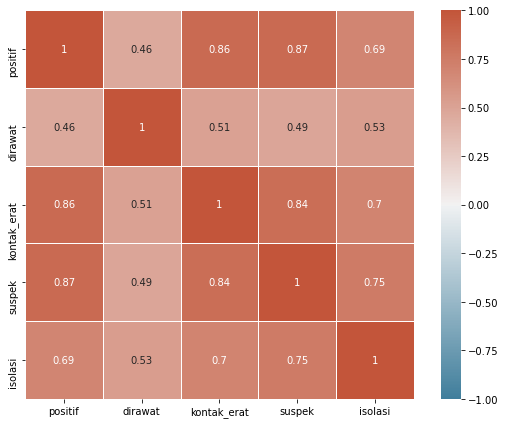

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot korelasi
corr = df_cluster.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

Nampaknya, semua feature berkolerasi positif dengan nilai korelasi antara 0,4 sampai 0,9. Umumnya untuk mengurangi kompleksitas model kita perlu mengurangi jumlah feature yang berkorelasi tinggi. Namun karena jumlah feature yang digunakan pada kali ini sedikit, maka tidak perlu mengurangi variabel yang berkorelasi tinggi.

### Melakukan Standardisasi pada Tiap Feature

Sebelum melakukan clustering, perlu dilakukan standardisasi supaya tidak ada feature yang mendominasi pengelompokan dikarenakan skala tiap feature yang berbeda-beda.

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardisasi  
df_model = StandardScaler().fit_transform(df_cluster)  

# Membuat DataFrame  
df_model = pd.DataFrame(data=df_model, index=df_cluster.index, columns=df_cluster.columns)  

# Preview Dataset
df_model.describe().round(2)

,positif,dirawat,kontak_erat,suspek,isolasi
count,28302.00,28302.00,28302.00,28302.00,28302.00
mean,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.31,-1.40,-1.36,-1.33,-1.23
25%,-0.78,-0.70,-0.73,-0.73,-0.70
50%,-0.19,-0.14,-0.22,-0.21,-0.21
75%,0.53,0.56,0.45,0.46,0.44
max,5.29,6.19,6.28,7.00,8.95


### Menentukan Jumlah Cluster
Menginstall library yellowbrick untuk visualisasi elbow method dan silhoutte score.

In [8]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


#### Menentukkan jumlah cluster dengan elbow method

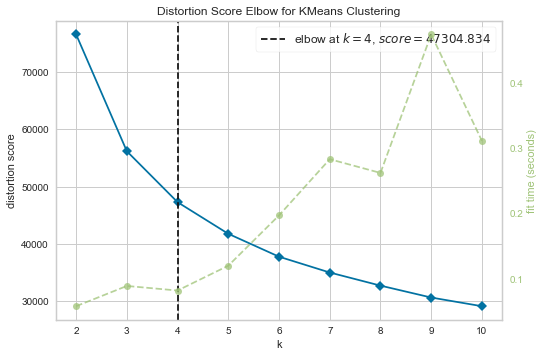

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method
model = KMeans(random_state=100, n_init=1)
visualizer = KElbowVisualizer(model)
visualizer.fit(df_model)
visualizer.show()

Jika menggunakan elbow method, jumlah cluster yang disarankan untuk clustering kali ini adalah 4 cluster.

#### Menghitung dan Memplot Silhoutte Score

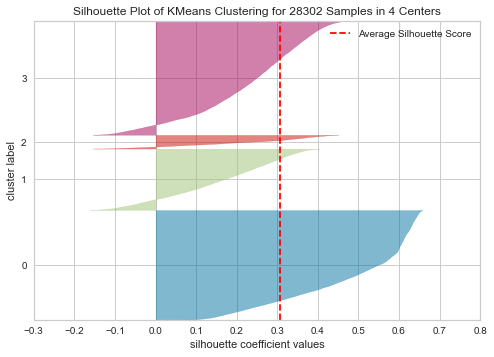

Nilai silhoutte score : 0.3054268144057691


In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

# Silhouette Score
model = KMeans(4, random_state=100, n_init=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick').fit(df_model)
visualizer.show()
print('Nilai silhoutte score :', visualizer.silhouette_score_)

Dengan 4 cluster, koefisien Silhoutte Score yang didapat sebesar 0,31.

### Membuat Model

In [11]:
# Inisiasi Model
n = 4
model = KMeans(n_clusters=n, random_state=100, n_init=1).fit(df_model)

# Membuat Cluster
predict = model.predict(df_model)

# Mengurutkan Cluster supaya tidak tertukar tiap run
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(n)
predict = lut[predict]

# Menambahkan Cluster pada df_model
df_model['cluster'] = predict

### Interpretasi Cluster 

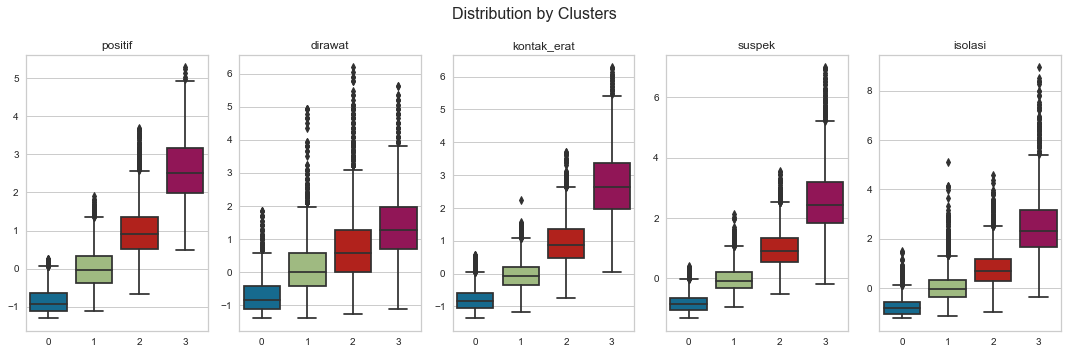

In [12]:
# Plot Distribusi
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
for column, ax in zip(df_model.columns, axes.flat):
    sns.boxplot(data=df_model, x='cluster', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.suptitle('Distribution by Clusters', size=16)
plt.tight_layout()
plt.show()

Berdasarkan distribusi tiap variabel, kita bisa melihat pengelompokkan tiap cluster berdasarkan pada tingkat paparan covid-19. Jika kita lihat dari variabel positif, dirawat, dan kontak_erat; cluster 0 merupakan cluster yang paling rendah tingkat paparannya, cluster 1 memiliki tingkat paparan sedang, cluster 2 memiliki tingkat paparan tinggi, dan cluster 3 memiliki tingkat paparan yang paling tinggi. Hasil interpretasi ini bisa digunakan untuk melihat mana daerah-daerah berdasarkan tingkat paparan covid-19.

### Renaming Cluster

Setelah mengetahui karakteristik cluster, kita bisa menamai cluster masing-masing seusai tingkat paparannya.

In [13]:
# Menamai dan Menambahkan cluster pada dataset utama
df_model['cluster'] = df_model['cluster'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'})
df['tingkat_paparan'] = df_model['cluster']

### Melihat Distribusi Feature Berdasarkan Cluster

Setelah menamai tiap cluster, kita bisa melihat distribusi cluster dari tiap feature yang digunakan. 

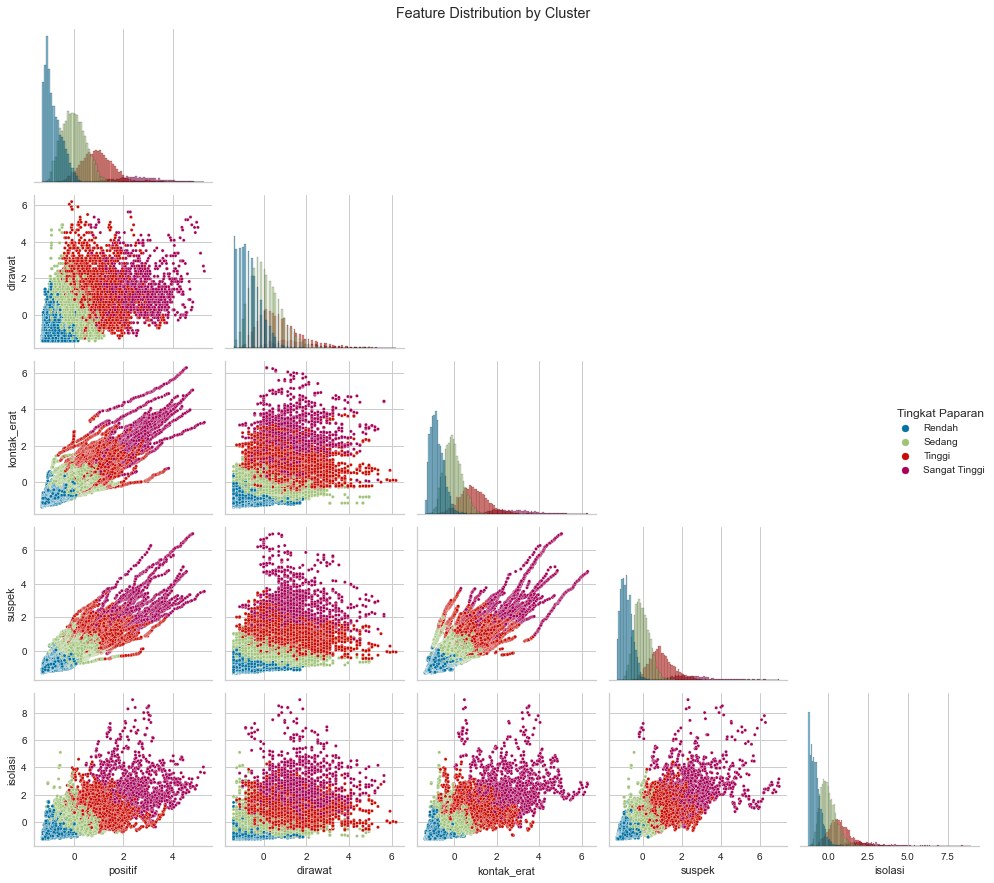

In [14]:
# Plot distribusi cluster
g = sns.PairGrid(df_model, hue='cluster', corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, s=10)
g.add_legend(title='Tingkat Paparan')
g.fig.suptitle('Feature Distribution by Cluster')
plt.tight_layout()
plt.show()

### Menyimpan Data Clustering

In [15]:
df.to_csv('data1_covid_dki_detailed_clean_with_cluster.csv', index=False)

### Jumlah Proporsi Kasus Positif Tiap Kota

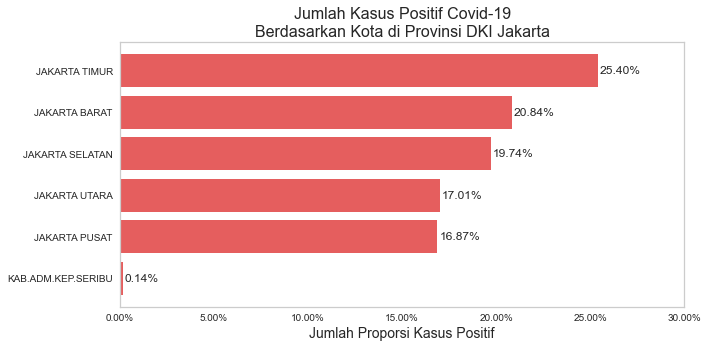

In [16]:
# Membuat Variabel
positif_kota = df.groupby(['nama_kota'])[['positif']].sum().reset_index()
positif_kota['presentase_postif'] = positif_kota['positif'] / positif_kota['positif'].sum()
positif_kota = positif_kota.sort_values(by='positif', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=positif_kota, y='nama_kota', width='presentase_postif', color='#e55e5e')
plt.title('Jumlah Kasus Positif Covid-19\nBerdasarkan Kota di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(positif_kota['presentase_postif'])):
    plt.text(x=v+0.001, y=i , s='{:,.2%}'.format(v), va='center')
plt.xlabel('Jumlah Proporsi Kasus Positif', size=14)
x = plt.gca().get_xticks()
plt.gca().set_xticks(x)
plt.gca().set_xticklabels(['{:,.2%}'.format(i) for i in x])
plt.gca().invert_yaxis()
plt.gca().grid(False)
plt.tight_layout()
plt.show()

Jumlah kasus positif di provinsi DKI Jakarta paling banyak disumbang oleh kota Jakarta Timur sebesar 25%, Jakarta Barat sebesar 21%, Jakarta Selatan sebesar 20%, Jakarta Utara sebesar 17%, Jakarta Pusat sebesar 17%, dan Kepulauan Seribu sebesar 0.14% 

### Melihat Wilayah Paparan Covid-19

#### Wilayah Paparan Sangat Tinggi di Tingkat Kelurahan

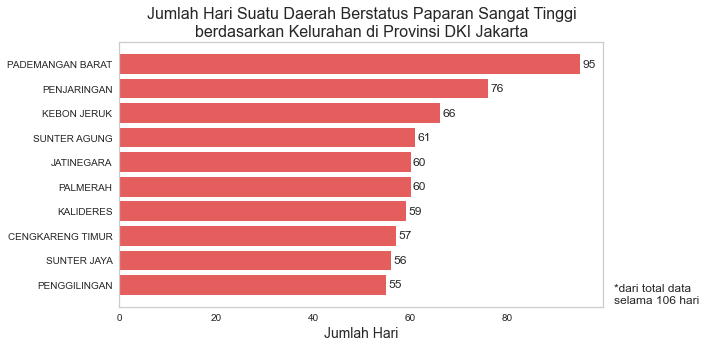

In [17]:
# Membuat Variabel
paparan_kelurahan = df.groupby(['tingkat_paparan', 'nama_kota', 'nama_kecamatan', 'nama_kelurahan'])['tanggal2'].count().reset_index(name='jumlah_hari')
paparan_kelurahan_sangat_tinggi = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Sangat Tinggi'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_sangat_tinggi, y='nama_kelurahan', width='jumlah_hari', color='#e55e5e')
plt.title('Jumlah Hari Suatu Daerah Berstatus Paparan Sangat Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_sangat_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=102, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().grid(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Di tingkat kelurahan, beberapa kelurahan berada pada tingkat paparan sangat tinggi seperti Kelurahan Pademangan Barat, Penjaringan, Kebon Jeruk. Baiknya, pemerintah perlu berfokus menangani kelurahan-kelurahan dengan tingkat paparan covid-19 yang tinggi.

#### Wilayah yang Perlu Diwaspadai

Selain wilayah yang terpapar covid-19 sangat tinggi, pemprov DKI Jakarta juga perlu mewaspadai wilayah yang sering berada di tingkat paparan tinggi.

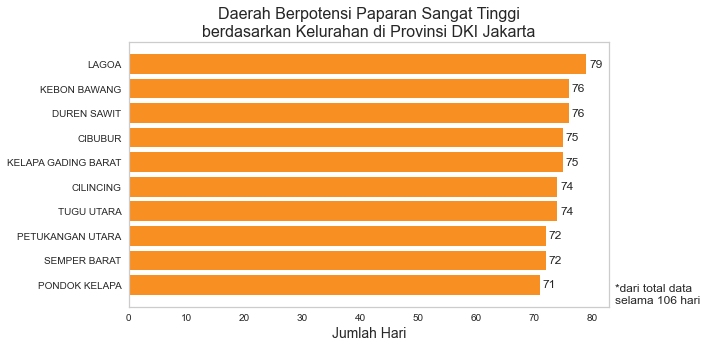

In [18]:
# Membuat Variabel
paparan_kelurahan_tinggi = paparan_kelurahan[paparan_kelurahan['tingkat_paparan'] == 'Tinggi'].sort_values(by='jumlah_hari', ascending=False).head(10)

# Plot Data
plt.figure(figsize=(10,5))
plt.barh(data=paparan_kelurahan_tinggi, y='nama_kelurahan', width='jumlah_hari', color='#f78f22')
plt.title('Daerah Berpotensi Paparan Sangat Tinggi\nberdasarkan Kelurahan di Provinsi DKI Jakarta',  size=16)
for i, v in enumerate(list(paparan_kelurahan_tinggi['jumlah_hari'])):
    plt.text(x=v+0.5, y=i , s=v, va='center')
plt.text(x=paparan_kelurahan_tinggi['jumlah_hari'].max() + 5, y=9.4, s='*dari total data\nselama 106 hari', va='center')
plt.xlabel('Jumlah Hari', size=14)
plt.gca().invert_yaxis()
plt.gca().grid(False)
plt.tight_layout()
plt.show()

Wilayah-wilayah di atas merupakan wilayah yang perlu diwaspadai. Kelurahan-kelurahan di atas sudah berada pada status terpapar tinggi selama hampir 80 hari. Hal ini menunjukan bahwa kelurahan-kelurahan di atas berpotensi untuk menjadi wilayah dengan tingkat paparan yang sangat tinggi.